# Определение возраста покупателей

# Исследовательский анализ данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Размер выборки 7591 изображений

график распределения возраста в выборке

<AxesSubplot:xlabel='real_age', ylabel='Density'>

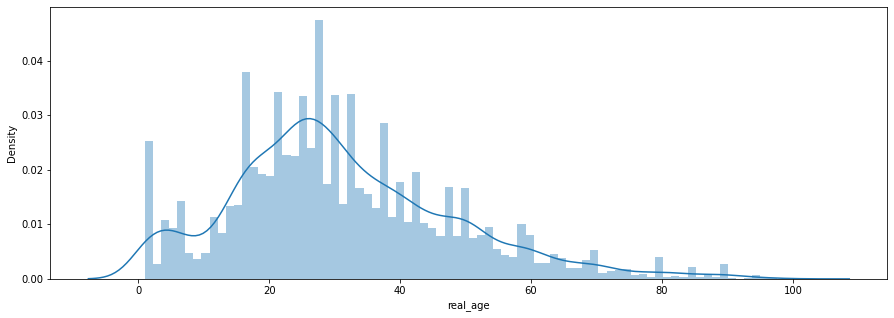

In [6]:
plt.figure(figsize=(15,5))
sns.distplot(labels["real_age"],  hist = True, bins=80)

<AxesSubplot:xlabel='real_age'>

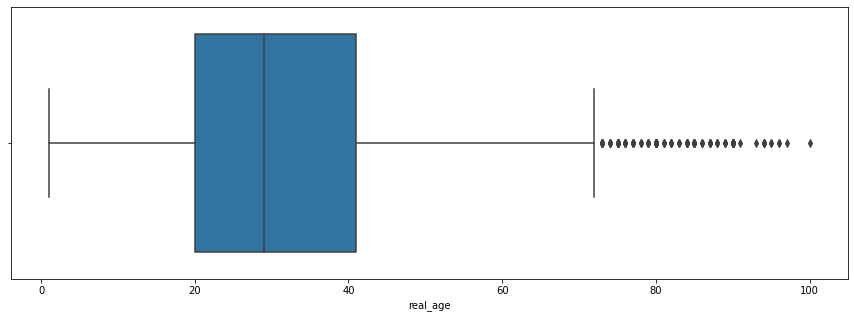

In [7]:
plt.figure(figsize=(15,5))
sns.boxplot(labels["real_age"])

Возрастная группа более 70 лет является выбросом. Медианный возраст 29 лет. Средний 31.2. Возраст имеет нормальное распределение с правым хвостом.

12 фото из обучающей выборки

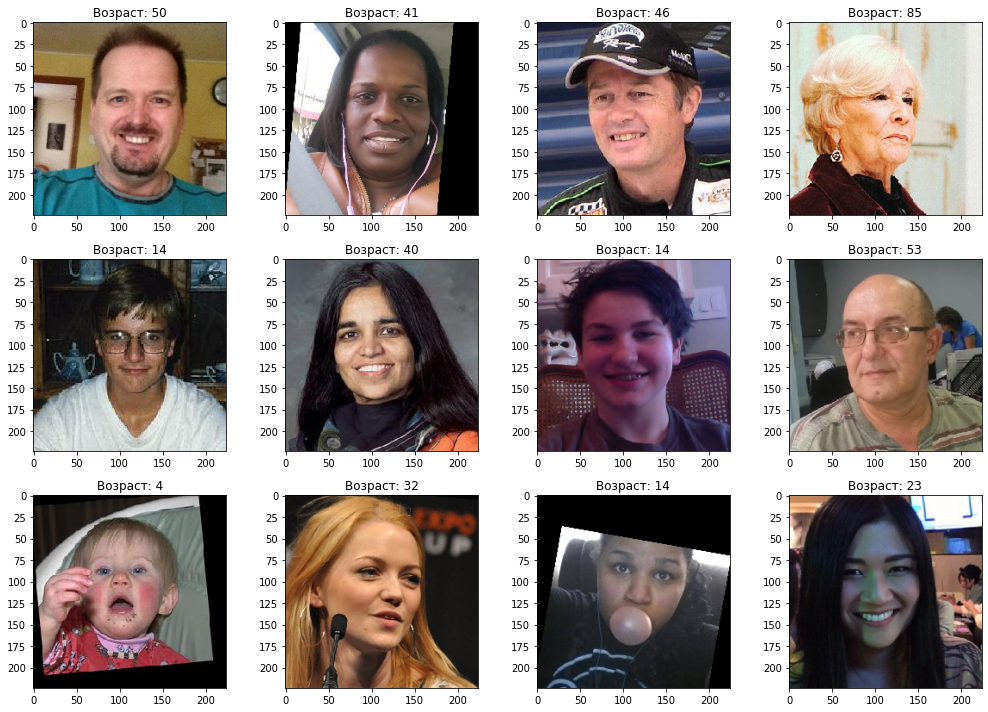

In [8]:
features, target = next(train_gen_flow)
fig = plt.figure(figsize=(15,10))

for i in range(12):
    fig.add_subplot(3, 4, i+1)
    
    plt.imshow(features[i])
    plt.tight_layout()
    plt.title('Возраст: ' + str(target[i]))

В выборке представлены фотографии людей различных возрастных групп. У фотографий различается качество, цвет, некоторые фотографии повернуты. 

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

## Анализ обученной модели

Напишите выводы здесь

Была построена модель с ResNet50, которая определяет возраст человека по фотографии с ошибкой в 6 лет (Test MAE: 6.0061).
Алгоритмом оптимизации выступала адаптивная оценка момента Adam с lr=0.0001. Обучение проходило на 10 эпохах.


Ошибка в 6 лет в некоторых случаях может негативно сказаться на бизнесе. Например такая ошибка будет весьма критичной при определении возраста детей и подростков по фотографии. Возможно фотофиксацияне сможет со 100% эффективностью контролировать добросовестность кассиров при продаже алкоголя. Тем не менее это все равно позволит анализировать покупки и предлагать товары, которые могут заинтересовать покупателей конкретной возрастной группы.

## Чек-лист

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ ]  MAE модели не больше 8
- [ ]  Код обучения модели скопирован в финальную тетрадь
- [ ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [ ]  По итогам обучения модели сделаны выводы